Take 1: (1) drop "special_cosiderations" and "status" colums

Take 8: (1) change all layers to sigmoid; 

Take 9: (1) change `n` of buckets; (2) change `n` of hiddent neurons

Take 10: (1) update random_state to `0`; (2) swap back to relu

# Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Determine the number of unique values in each column.
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME","SPECIAL_CONSIDERATIONS"])
print(application_df.shape)
application_df.head(10)

(34299, 9)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [5]:
application_df.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [6]:
# ASK_AMT to float
# application_df["ASK_AMT"] = application_df["ASK_AMT"].astype("float64")
# application_df.dtypes

In [7]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

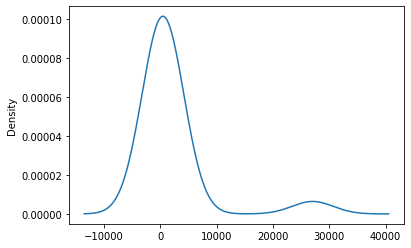

In [8]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ...?
# use 500
replace_application = list(app_type_count[app_type_count <2000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     7262
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
unique_class = application_df.CLASSIFICATION.nunique()
class_count = application_df.CLASSIFICATION.value_counts()
print(unique_class)
print(class_count)

71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1820        1
C4120        1
C2150        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64


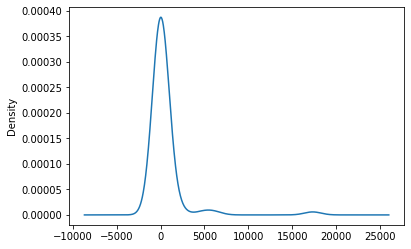

In [11]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [12]:
# Determine which values to replace if counts are less than ..?
# use 1000 for fewer bins
replace_class = list(class_count[class_count < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
# name categorical_cat - used in the next cell
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
application_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T3             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64
INCOME_AMT_0                    float64


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = "IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# The number of hidden neurons should be between the size of the input layer and the size of the output layer.
# The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
# The number of hidden neurons should be less than twice the size of the input layer.

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5
hidden_nodes_layer4 = 2
#hidden_nodes_layer5 = 25

nn = tf.keras.models.Sequential()

# ReLu is faster to compute than the sigmoid function, and its derivative is faster to compute
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Fifth hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 940
Trainable params: 940
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 781us/step - loss: 0.6760 - accuracy: 0.5774
Epoch 2/100
181/804 [=====>........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6875
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.6199 - accuracy: 0.6983
Epoch 3/100
388/804 [=============>................] - ETA: 0s - loss: 0.6097 - accuracy: 0.6994
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.6074 - accuracy: 0.7006
Epoch 4/100
548/804 [===================>..........] - ETA: 0s - loss: 0.6043 - accuracy: 0.7026
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 853us/step - loss: 0.6063 - accuracy: 0.7005
Epoch 5/100
744/804 [==========================>...] - ETA: 0s - loss: 0.6068 - accuracy: 0.6996
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 

804/804 [==============================] - 1s 821us/step - loss: 0.5950 - accuracy: 0.7082
Epoch 39/100
389/804 [=============>................] - ETA: 0s - loss: 0.5945 - accuracy: 0.7053
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 799us/step - loss: 0.5942 - accuracy: 0.7074
Epoch 40/100
611/804 [=====================>........] - ETA: 0s - loss: 0.5923 - accuracy: 0.7092
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 769us/step - loss: 0.5931 - accuracy: 0.7082
Epoch 41/100
804/804 [==============================] - 1s 814us/step - loss: 0.5912 - accuracy: 0.7075
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.5058 - accuracy: 0.7812
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 724us/step - loss: 0.5891 - accuracy: 0.7075
Epoch 43/100
198/804 [======>.......................] - ETA: 0s - l

Epoch 76/100
675/804 [========================>.....] - ETA: 0s - loss: 0.5751 - accuracy: 0.7154
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 1s 857us/step - loss: 0.5751 - accuracy: 0.7143
Epoch 77/100
804/804 [==============================] - 1s 889us/step - loss: 0.5752 - accuracy: 0.7144
Epoch 78/100
 60/804 [=>............................] - ETA: 0s - loss: 0.5922 - accuracy: 0.7000
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 895us/step - loss: 0.5751 - accuracy: 0.7145
Epoch 79/100
257/804 [========>.....................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7181
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 858us/step - loss: 0.5749 - accuracy: 0.7148
Epoch 80/100
458/804 [================>.............] - ETA: 0s - loss: 0.5750 - accuracy: 0.7160
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5801 - accuracy: 0.7113
Loss: 0.580138087272644, Accuracy: 0.7112536430358887


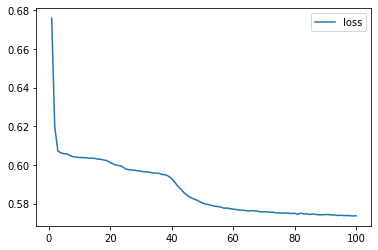

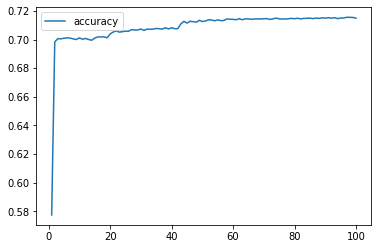

In [24]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input
history_df.plot(y="loss")
# Plot the accuracy
# the higher the better 
history_df.plot(y="accuracy")

In [25]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_12.h5")